In [80]:
from IPython.display import display, HTML
import json
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib.pyplot import figure
from yattag import Doc

In [35]:
words = ['Minneapolis', 'technology', 'science', 'politics']
times_of_the_times = range(1851, 2020)

In [36]:
# Compute dict { year: 1900, Minneapolis: 121, technology: 1212, ...}
lst = []
for year in times_of_the_times:
    final = { "year": year }
    for word in words:
        f=open("data/" + word + "_" + str(year), "r")
        txt = f.read()
        obj = json.loads(txt)
        final[word] = obj['response']['meta']['hits']
    lst.append(final)
        

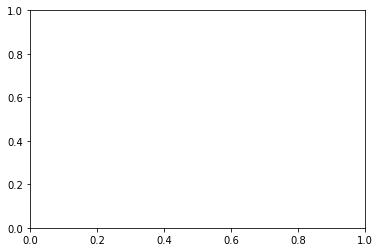

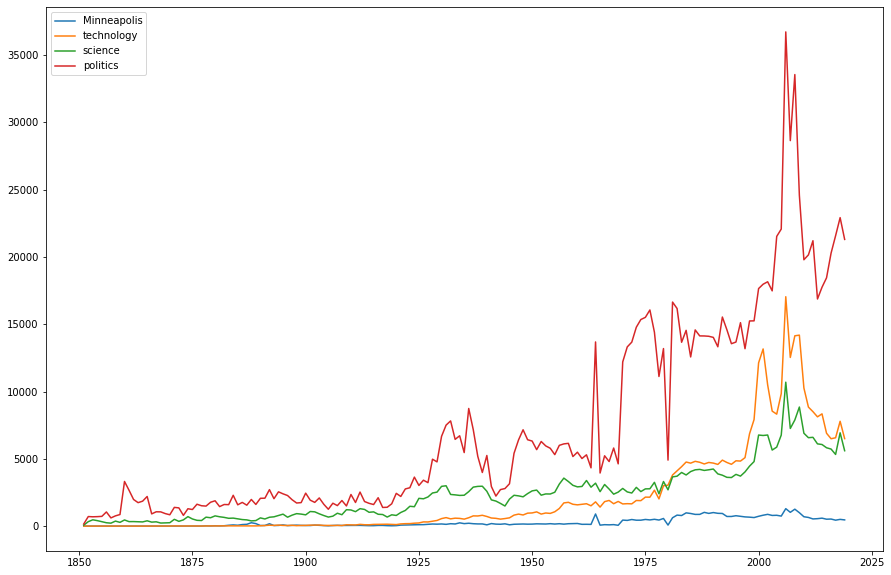

In [76]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,10))
for word in words: 
    plt.plot(
        times_of_the_times, 
        list(map(lambda x: x[word], lst)), 
        label = word, 
        linestyle="-"
    )
plt.legend()

In [51]:
# Calculate average for baseline
word_avgs = {}
for word in words: 
    word_avgs[word] = mean(list(map(lambda x: x[word], lst)))
word_avgs

{'Minneapolis': 269.4852071005917,
 'technology': 2152.4792899408285,
 'science': 2397.9881656804732,
 'politics': 7277.485207100592}

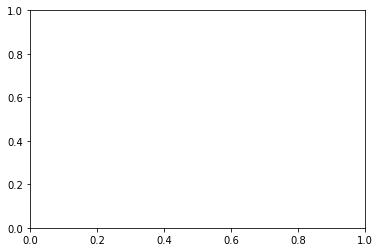

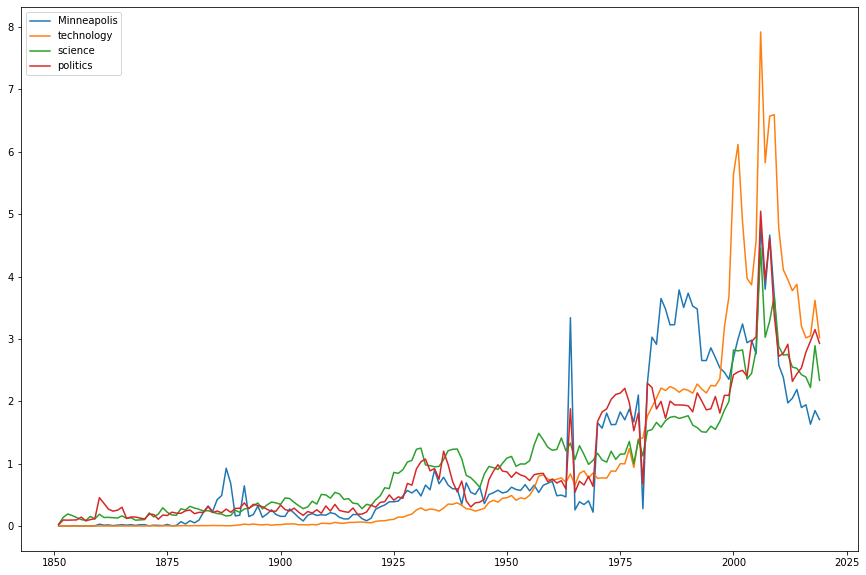

In [74]:
# Adjust plots based on average baseline (so Minneapolis shows up lol)
fig, ax = plt.subplots()
plt.figure(figsize=(15,10))
for word in words: 
    plt.plot(
        times_of_the_times, 
        list(map(lambda x: x / word_avgs[word], list(map(lambda x: x[word], lst)))), 
        label = word, 
        linestyle="-"
    ) 
plt.legend()

In [ ]:
lst = []
for year in times_of_the_times:
    final = { "year": year }
    for word in words:
        f=open("data/" + word + "_" + str(year), "r")
        txt = f.read()
        obj = json.loads(txt)
        final[word] = obj['response']['meta']['hits']
    lst.append(final)

In [149]:
def get_article_id(year, word, index):
    return str(year) + '_' + word + '_' + str(index);

def create_HTML_single(year, word, index):
    f=open("data/" + word + "_" + str(year), "r")
    txt = f.read()
    obj = json.loads(txt)
    try:
        article = obj['response']['docs'][index]
        doc, tag, text = Doc().tagtext()
        with tag('div', id=get_article_id(year, word, index)):
            with tag('h3'):
                text(article['headline']['main'] + ' ')
                with tag('i'):
                    text('(' + article['pub_date'][:10] + ')')
            with tag('div'):
                text('The original article: ')
                with tag('a', href=article['web_url']):
                    text('here.')
            with tag('div'):
                text('Abstract:')
                text(article['abstract'])
            with tag('i'): 
                text(article['lead_paragraph'] + '...')
        return doc.getvalue()
    except:
        return ''

def create_all_HTML():
    doc, tag, text = Doc().tagtext()
    with tag('html'):
        with tag('body'):
            with tag('h1'):
                text('Table of Contents')
            for year in times_of_the_times:
                for word in words:
                    with tag('div'):
                        with tag('a', href="#" + get_article_id(year, word, 0)):
                            text(str(year) + ' ' + word)
            for year in times_of_the_times:
                with tag('h2'):
                    text('Articles from ' + str(year))
                for word in words:
                    with tag('h2'):
                        text('Articles from ' + str(year) + ' about ' + word)
                    for index in range(0,10):
                        doc.asis(create_HTML_single(year, word, index))
    return doc.getvalue()

the_html = create_all_HTML()

In [150]:
f = open("article_sampling.html", "w")
f.write(the_html)
f.close()